# Gradient descent in one dimension

Contents
 - Define a function to minimise
 - gradient descent
 - momentum
 - NAG

Findings:
 - x
 
Notes
 - the class which does gd is stored as a separate module (gd)

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from gd import gd_1d

%matplotlib inline

**Simple function**

 - for testing early versions of the class

In [2]:
# loss function 1:
# simple quadratic for first experiements
def fn_loss(x):
    return (x + 2)**2
    
def fn_grad(x):
    return 2*(x + 2)

**Complex function**
 - created to see how different variants would cope

In [3]:
# loss function 2:
def fn_loss(x):
    return 0.00001*x**4 + 0.001*x**3 + 1*np.cos(x) 

def fn_grad(x):
    return 0.00004*x**3 + 0.003*x**2 - 1*np.sin(x)

**Illustrate the loss function**

In [4]:
x = np.arange(-100, 10, 0.01)
y = fn_loss(x)

Text(0, 0.5, 'loss')

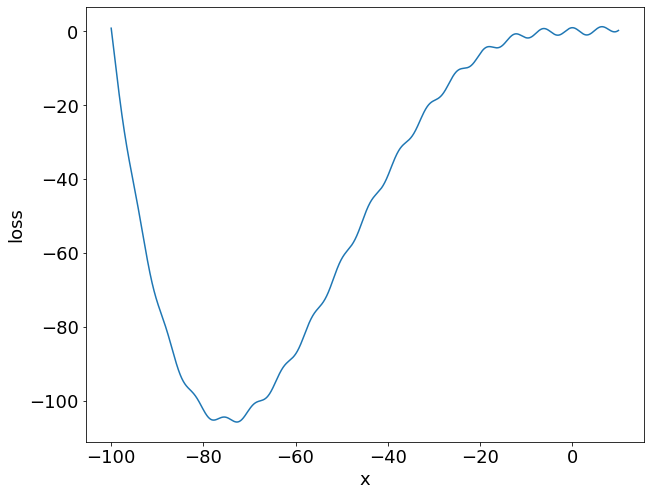

In [5]:
font = {'size': 18}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x, y)
ax1.set_xlabel('x')
ax1.set_ylabel('loss')

**Estimate the minimum with a brute force search**

In [6]:
x = np.arange(-100, 100, 0.01)
y = fn_loss(x)
idx_min = np.argmin(y)
print(x[idx_min])
print(y[idx_min])
# -105.8 at x = -72.7

-72.74999999998606
-105.80248604204718


**Gradient Descent**

In [7]:
solver = gd_1d(fn_loss = fn_loss, fn_grad = fn_grad)
solver.pv(x_init = 4, n_iter = 1000, eta = 0.1, tol = 1e-5)

Converged in 108 steps.  Loss fn -0.9684861852161867 achieved by x = 3.1113504752115038


Text(0, 0.5, 'loss')

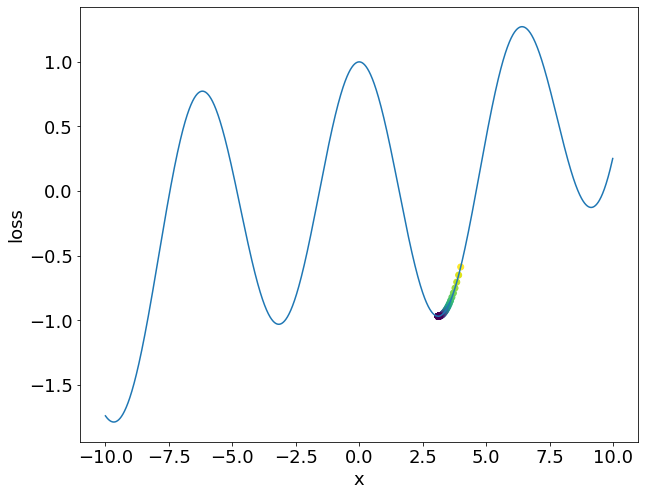

In [8]:
x_range = np.arange(-10, 10, 0.01)
y_range = fn_loss(x_range)

font = {'size': 18}
matplotlib.rc('font', **font)

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(solver.loss_path - np.min(solver.loss_path) + 0.01)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))

colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x_range, y_range)
ax1.scatter(solver.x_path, solver.loss_path, color=colours)
ax1.set_xlabel('x')
ax1.set_ylabel('loss')

### Momentum

Despite momentum, gd still gets stuck in local minima.

In [9]:
solver = gd_1d(fn_loss = fn_loss, fn_grad = fn_grad)
solver.momentum(x_init = 5, n_iter = 10000, eta = 1, tol = 1e-5, alpha = 0.995)

Converged in 1869 steps.  Loss fn -0.9684861852530263 achieved by x = 3.1113428187582692


Text(0, 0.5, 'loss')

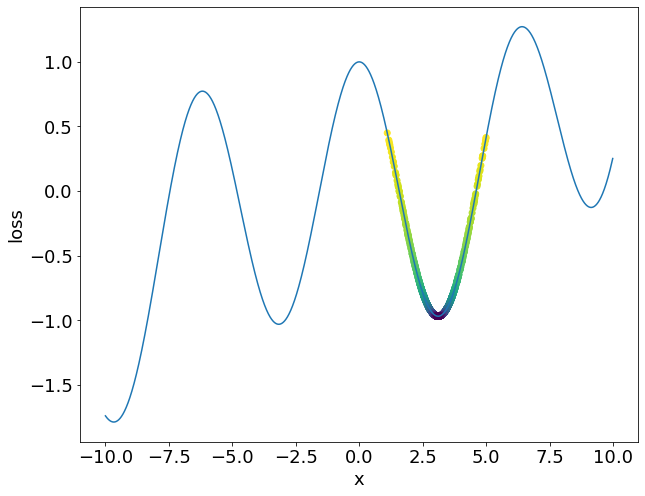

In [10]:
x_range = np.arange(-10, 10, 0.01)
y_range = fn_loss(x_range)

font = {'size': 18}
matplotlib.rc('font', **font)

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(solver.loss_path - np.min(solver.loss_path) + 0.01)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))

colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x_range, y_range)
ax1.scatter(solver.x_path, solver.loss_path, color=colours)
ax1.set_xlabel('x')
ax1.set_ylabel('loss')

### Nesterov's Accelarated Gradient

With some fiddling of the step size and momentum, we managed to get NAG to climb through the local maxima.

In [11]:
solver = gd_1d(fn_loss = fn_loss, fn_grad = fn_grad)
solver.nag(x_init = 5, n_iter = 10000, eta = 5, tol = 1e-5, alpha = 0.90)

Did not converge


Text(0, 0.5, 'loss')

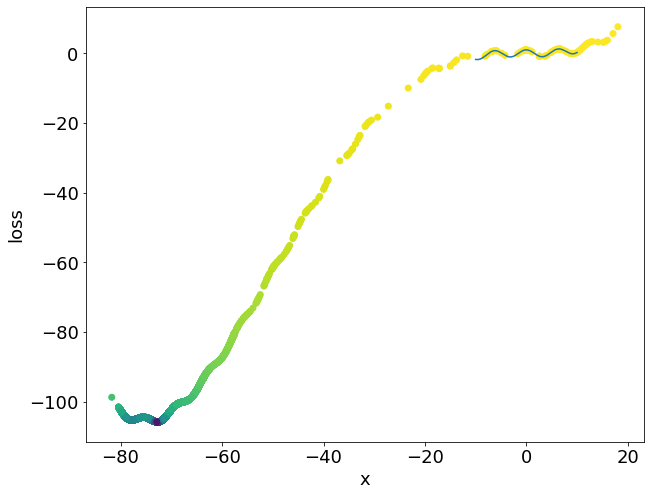

In [12]:
x_range = np.arange(-10, 10, 0.01)
y_range = fn_loss(x_range)

font = {'size': 18}
matplotlib.rc('font', **font)

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(solver.loss_path - np.min(solver.loss_path) + 0.01)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))

colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x_range, y_range)
ax1.scatter(solver.x_path, solver.loss_path, color=colours)
ax1.set_xlabel('x')
ax1.set_ylabel('loss')